# Part I

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('./titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Part II

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Container object of 12 artists>

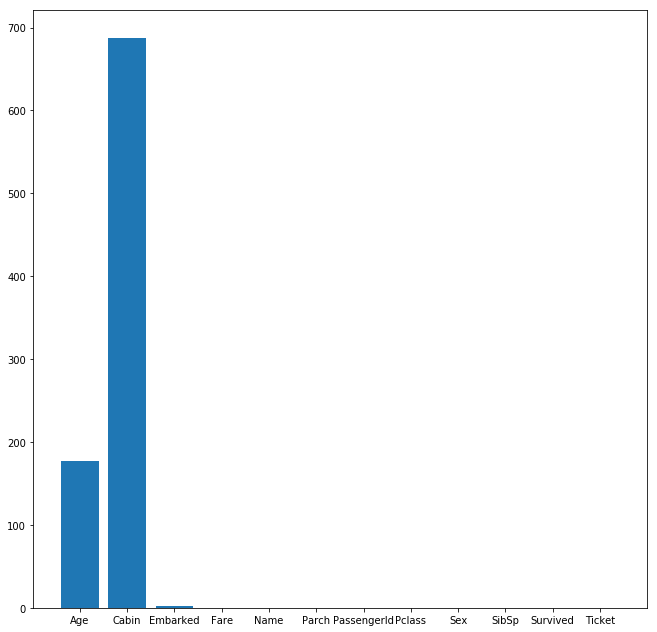

In [5]:
figure = plt.figure(figsize=(11,11))
plt.bar(titanic.columns, titanic.isnull().sum())

Most of the columns have completed data, with only 3 not having been completed. Cabin is lacking the most info - at 687 of the 891 passengers listed in the data, roughly 77%. A casual guess would suggest that the notation of a passenger's cabin would be related to the passenger's ticket class. And indeed, this appears to be related to the class of passenger - the vast majority of 1st class passengers do have a cabin listed, while the vast majority of 2nd and 3rd class passengers do not. However, it's not universal - forty 1st class passengers do not have a cabin listed, while sixteen 2nd class and a dozen 3rd class passengers do.

In [6]:
titanic['Pclass'][titanic['Cabin'].isnull() == 0].value_counts()

1    176
2     16
3     12
Name: Pclass, dtype: int64

In [7]:
titanic['Pclass'][titanic['Cabin'].isnull()].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

However, there are some other correlations on whether or not a passenger's cabin data was filled. While embarking in Southampton was roughly average to the entire dataset, embarking in Cherbourg meant that the data was much less likely to be null, with 40% of the values filled in comparison to roughly 20-25%. Meanwhile, embarking in Queenstown meant cabin data was almost certainly null, with only 4 of the 77 having that information filled.

In [8]:
titanic['Embarked'][titanic['Cabin'].isnull() == 0].value_counts()

S    129
C     69
Q      4
Name: Embarked, dtype: int64

In [9]:
titanic['Embarked'][titanic['Cabin'].isnull()].value_counts()

S    515
C     99
Q     73
Name: Embarked, dtype: int64

As requested, we'll fill out all these null cabin values with ¯\\(ツ)/¯

In [10]:
cabin_replace = {'Cabin': '¯\(ツ)/¯'}
titanic.fillna(cabin_replace, inplace = True)
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


On the other hand, I couldn't find any particular correlation on who did and who didn't have age values listed, the second largest null value, making it harder to infer any reason that correlation. Finally, we have our two missing embarkation values.

In [11]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


A casual Google search on Miss Amelie Icard indicates that she embarked on the Titanic in Southampton with Mrs. Stone, serving as her maid, but for the sake of the project, we'll dump these two null values.

In [12]:
titanic.dropna(subset=['Embarked'], inplace = True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


# Part III

In [13]:
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


In [14]:
titanic['isReverend'] = titanic['Name'].str.contains("Rev.").astype(int)
titanic[titanic['isReverend'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0,1


In [15]:
temp_embark = titanic['Embarked']
titanic = pd.get_dummies(titanic,columns=['Embarked'])
titanic['Embarked'] = temp_embark
#wanting to keep the embarked variable while adding the dummy variables
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,isReverend,Embarked_C,Embarked_Q,Embarked_S,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,S


In [16]:
temp_sex = titanic['Sex']
titanic = pd.get_dummies(titanic,columns=['Sex'])
titanic['Sex'] = temp_sex
#same as before, wanting to keep sex variable while adding the dummy variables
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,isReverend,Embarked_C,Embarked_Q,Embarked_S,Embarked,Sex_female,Sex_male,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,S,0,1,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,C,1,0,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,S,1,0,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,S,1,0,female
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,S,0,1,male


In [17]:
titles = []
for names in range(len(titanic['Name'])):
    if names < 61:
        titles.append(titanic['Name'].str.split(', ')[names][1].split('.')[0])
    elif (names >= 61) & (names < 828):
        titles.append(titanic['Name'].str.split(', ')[names + 1][1].split('.')[0])
    else:
        titles.append(titanic['Name'].str.split(', ')[names + 2][1].split('.')[0])
#if/elif/else takes care of the dropped indexes
#first splits the string by the comma after the last name, and takes the second of the two strings in the list
#(position 1), then takes that string and splits it on the period, taking the first of the two strings in the list
#(position 0)
titanic['Title'] = titles
titanic = pd.get_dummies(titanic,columns=['Title'])
titanic['Title'] = titles
#and for the third time, wanting to keep the variable along with the dummy variable. Easier here as I already have
#the variable, don't need to make a temp one.
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,...,0,0,0,1,0,0,0,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,1,0,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,...,1,0,0,0,0,0,0,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,1,0,0,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,...,0,0,0,1,0,0,0,0,0,Mr


In [18]:
titanic['Title'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
the Countess      1
Sir               1
Capt              1
Jonkheer          1
Lady              1
Mme               1
Don               1
Ms                1
Name: Title, dtype: int64

# Part IV

In [19]:
print(titanic['Survived'].sum())
print(len(titanic))
(titanic['Survived'].sum()/len(titanic)) * 100
#survival rate in %

340
889


38.24521934758155

<Container object of 2 artists>

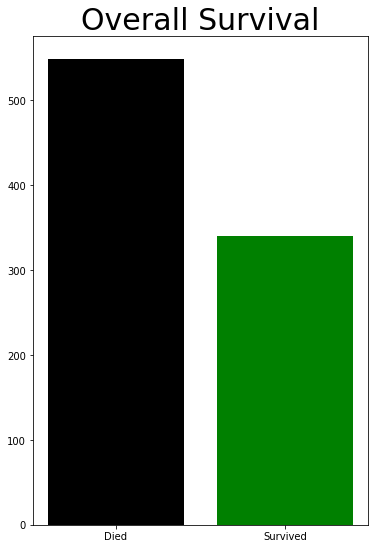

In [20]:
figure = plt.figure(figsize= (6,9))
plt.title('Overall Survival', fontsize = 30)
plt.bar(['Died', 'Survived'], [len(titanic['Survived']) - titanic['Survived'].sum(), titanic['Survived'].sum()], color = ['black', 'green'])

In [21]:
print(titanic[titanic['Sex'] == 'male']['Survived'].sum())
print(len(titanic[titanic['Sex'] == 'male']))
(titanic[titanic['Sex'] == 'male']['Survived'].sum()/len(titanic[titanic['Sex'] == 'male'])) * 100
#male survival rate, %

109
577


18.890814558058924

<Container object of 2 artists>

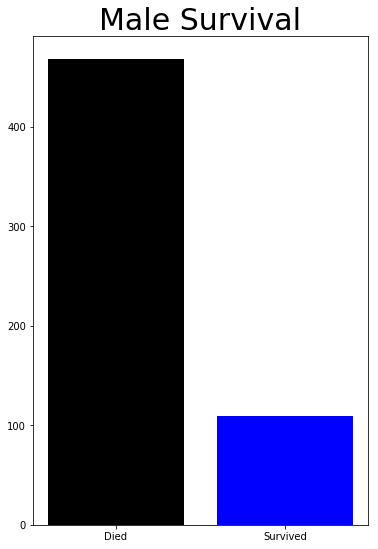

In [22]:
figure = plt.figure(figsize= (6,9))
plt.title('Male Survival', fontsize = 30)
plt.bar(['Died', 'Survived'], [len(titanic[titanic['Sex'] == 'male']) - titanic[titanic['Sex'] == 'male']['Survived'].sum(), titanic[titanic['Sex'] == 'male']['Survived'].sum()], color = ['black', 'blue'])

In [23]:
print(titanic[titanic['Sex'] == 'female']['Survived'].sum())
print(len(titanic[titanic['Sex'] == 'female']))
(titanic[titanic['Sex'] == 'female']['Survived'].sum()/len(titanic[titanic['Sex'] == 'female'])) * 100
#female survival rate, %

231
312


74.03846153846155

<Container object of 2 artists>

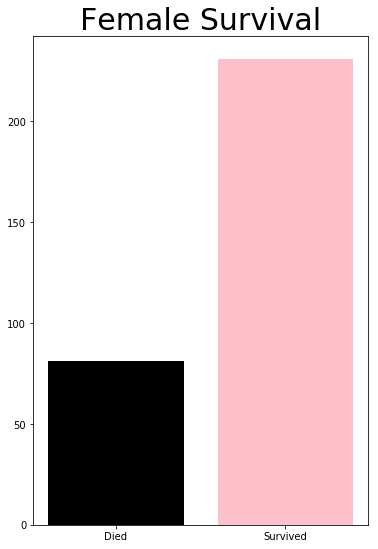

In [24]:
figure = plt.figure(figsize= (6,9))
plt.title('Female Survival', fontsize = 30)
plt.bar(['Died', 'Survived'], [len(titanic[titanic['Sex'] == 'female']) - titanic[titanic['Sex'] == 'female']['Survived'].sum(), titanic[titanic['Sex'] == 'female']['Survived'].sum()], color = ['black', 'pink'])

([<matplotlib.axis.XTick at 0x10bf1dcc0>,
 <a list of 3 Text xticklabel objects>)

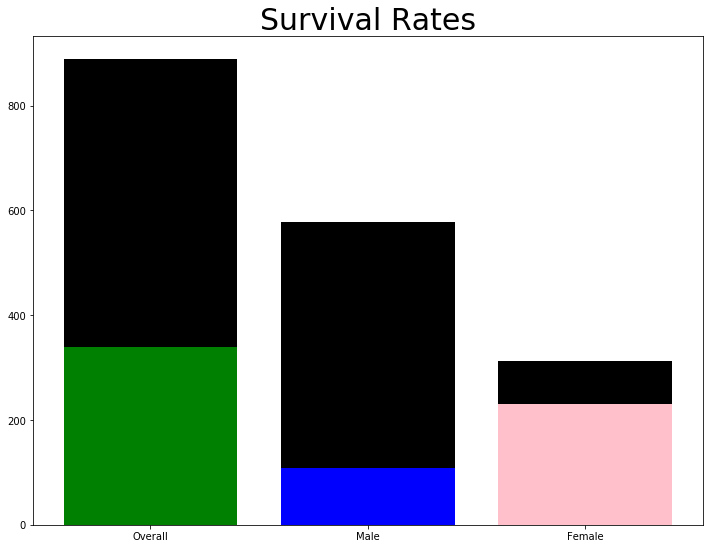

In [25]:
figure = plt.figure(figsize= (12,9))
plt.title('Survival Rates', fontsize = 30)
p_d = plt.bar(np.arange(3), [len(titanic), len(titanic[titanic['Sex'] == 'male']), len(titanic[titanic['Sex'] == 'female'])], color='black')
p_s = plt.bar(np.arange(3), [titanic['Survived'].sum(), titanic[titanic['Sex'] == 'male']['Survived'].sum(), titanic[titanic['Sex'] == 'female']['Survived'].sum()], color=['green', 'blue', 'pink'])
plt.xticks(np.arange(3), ['Overall', 'Male', 'Female'])

In [26]:
print(titanic[titanic['Pclass'] == 1]['Survived'].sum())
print(len(titanic[titanic['Pclass'] == 1]))
(titanic[titanic['Pclass'] == 1]['Survived'].sum()/len(titanic[titanic['Pclass'] == 1])) * 100
#first class survival rate, %

134
214


62.616822429906534

<Container object of 2 artists>

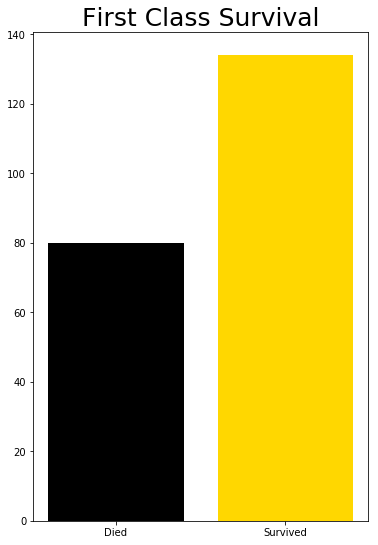

In [27]:
figure = plt.figure(figsize= (6,9))
plt.title('First Class Survival', fontsize = 25)
plt.bar(['Died', 'Survived'], [len(titanic[titanic['Pclass'] == 1]) - titanic[titanic['Pclass'] == 1]['Survived'].sum(), titanic[titanic['Pclass'] == 1]['Survived'].sum()], color = ['black', 'gold'])

In [28]:
print(titanic[titanic['Pclass'] == 2]['Survived'].sum())
print(len(titanic[titanic['Pclass'] == 2]))
(titanic[titanic['Pclass'] == 2]['Survived'].sum()/len(titanic[titanic['Pclass'] == 2])) * 100
#second class survival rate, %

87
184


47.28260869565217

<Container object of 2 artists>

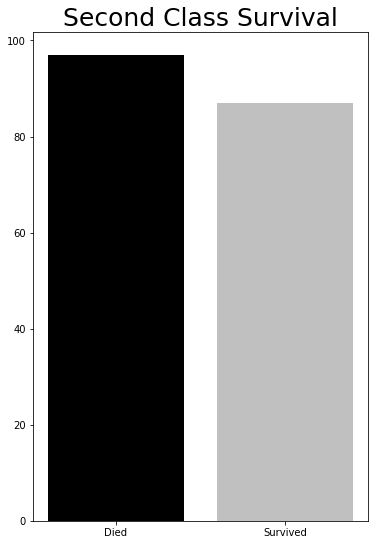

In [29]:
figure = plt.figure(figsize= (6,9))
plt.title('Second Class Survival', fontsize = 25)
plt.bar(['Died', 'Survived'], [len(titanic[titanic['Pclass'] == 2]) - titanic[titanic['Pclass'] == 2]['Survived'].sum(), titanic[titanic['Pclass'] == 2]['Survived'].sum()], color = ['black', 'silver'])

In [30]:
print(titanic[titanic['Pclass'] == 3]['Survived'].sum())
print(len(titanic[titanic['Pclass'] == 3]))
(titanic[titanic['Pclass'] == 3]['Survived'].sum()/len(titanic[titanic['Pclass'] == 3])) * 100
#third class survival rate, %

119
491


24.236252545824847

<Container object of 2 artists>

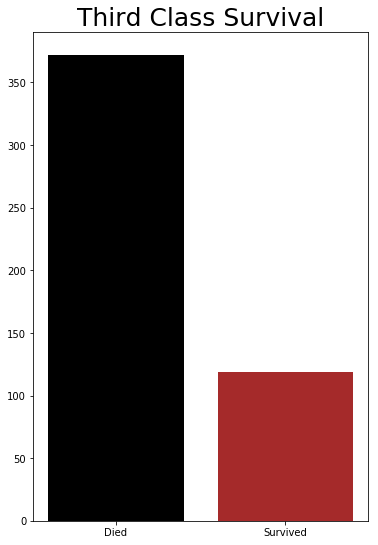

In [31]:
figure = plt.figure(figsize= (6,9))
plt.title('Third Class Survival', fontsize = 25)
plt.bar(['Died', 'Survived'], [len(titanic[titanic['Pclass'] == 3]) - titanic[titanic['Pclass'] == 3]['Survived'].sum(), titanic[titanic['Pclass'] == 3]['Survived'].sum()], color = ['black', 'brown'])

([<matplotlib.axis.XTick at 0x1a1c43f390>,
 <a list of 3 Text xticklabel objects>)

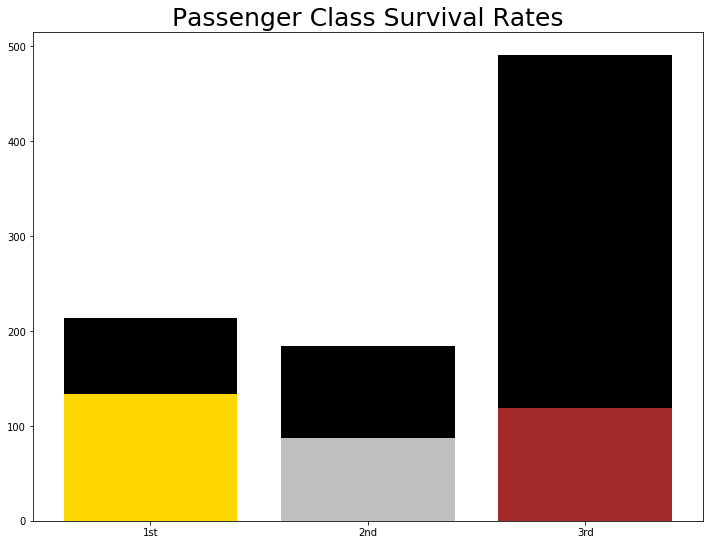

In [32]:
figure = plt.figure(figsize= (12,9))
plt.title('Passenger Class Survival Rates', fontsize = 25)
p_d = plt.bar(np.arange(3), [len(titanic[titanic['Pclass'] == 1]), len(titanic[titanic['Pclass'] == 2]), len(titanic[titanic['Pclass'] == 3])], color='black')
p_s = plt.bar(np.arange(3), [titanic[titanic['Pclass'] == 1]['Survived'].sum(), titanic[titanic['Pclass'] == 2]['Survived'].sum(), titanic[titanic['Pclass'] == 3]['Survived'].sum()], color=['gold', 'silver', 'brown'])
plt.xticks(np.arange(3), ['1st', '2nd', '3rd'])

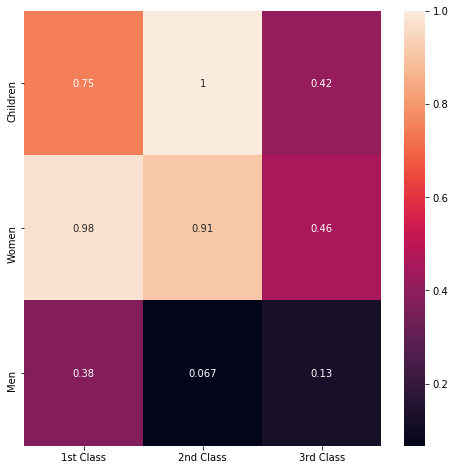

In [33]:
figure = plt.figure(figsize=(8,8))
womenchildren = [titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 1)]['Survived'].mean(), titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 2)]['Survived'].mean(), titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 3)]['Survived'].mean(), titanic[(((titanic['Age'] > 12.0) & (titanic['Sex'] == 'female')) & (titanic['Pclass'] == 1))]['Survived'].mean(), titanic[(((titanic['Age'] > 12.0) & (titanic['Sex'] == 'female')) & (titanic['Pclass'] == 2))]['Survived'].mean(), titanic[(((titanic['Age'] > 12.0) & (titanic['Sex'] == 'female')) & (titanic['Pclass'] == 3))]['Survived'].mean(), titanic[(((titanic['Age'] > 12.0) & (titanic['Sex'] == 'male')) & (titanic['Pclass'] == 1))]['Survived'].mean(), titanic[(((titanic['Age'] > 12.0) & (titanic['Sex'] == 'male')) & (titanic['Pclass'] == 2))]['Survived'].mean(), titanic[(((titanic['Age'] > 12.0) & (titanic['Sex'] == 'male')) & (titanic['Pclass'] == 3))]['Survived'].mean()]
sns.heatmap(np.array(womenchildren).reshape(3, 3), annot=True, xticklabels = ['1st Class', '2nd Class', '3rd Class'], yticklabels = ['Children', 'Women', 'Men'])

In [34]:
titanic[titanic['Title_Rev'] == 1]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Title
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",42.0,0,0,244310,13.000,¯\(ツ)/¯,...,0,0,0,0,0,0,1,0,0,Rev
150,151,0,2,"Bateman, Rev. Robert James",51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,...,0,0,0,0,0,0,1,0,0,Rev
249,250,0,2,"Carter, Rev. Ernest Courtenay",54.0,1,0,244252,26.000,¯\(ツ)/¯,...,0,0,0,0,0,0,1,0,0,Rev
626,627,0,2,"Kirkland, Rev. Charles Leonard",57.0,0,0,219533,12.350,¯\(ツ)/¯,...,0,0,0,0,0,0,1,0,0,Rev
848,849,0,2,"Harper, Rev. John",28.0,0,1,248727,33.000,¯\(ツ)/¯,...,0,0,0,0,0,0,1,0,0,Rev
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.000,¯\(ツ)/¯,...,0,0,0,0,0,0,1,0,0,Rev


No reverends survived the Titanic.

In [35]:
print(titanic[titanic['Cabin'] == '¯\(ツ)/¯']['Survived'].sum())
print(len(titanic[titanic['Cabin'] == '¯\(ツ)/¯']))
(titanic[titanic['Cabin'] == '¯\(ツ)/¯']['Survived'].sum()/len(titanic[titanic['Cabin'] == '¯\(ツ)/¯'])) * 100
#¯\(ツ)/¯ survival rate, %

206
687


29.985443959243085

Given that previous analysis of whether cabins had info related to the class of the passengers, which itself had a strong correlation on whether or not one survives, it's not surprising that those who didn't have cabins listed fared worse than on average

In [36]:
print(titanic[titanic['Age'].isnull()]['Survived'].sum())
print(len(titanic[titanic['Age'].isnull()]))
(titanic[titanic['Age'].isnull()]['Survived'].sum() / len(titanic[titanic['Age'].isnull()])) * 100
#null age survival rate, %

52
177


29.37853107344633

In [37]:
print(titanic[titanic['Embarked'] == 'C']['Survived'].sum())
print(len(titanic[titanic['Embarked'] == 'C']['Survived']))
(titanic[titanic['Embarked'] == 'C']['Survived'].sum() / len(titanic[titanic['Embarked'] == 'C']['Survived'])) * 100
#Cherbourg embarkation survival rate

93
168


55.35714285714286

In [38]:
print(titanic[titanic['Embarked'] == 'S']['Survived'].sum())
print(len(titanic[titanic['Embarked'] == 'S']['Survived']))
(titanic[titanic['Embarked'] == 'S']['Survived'].sum() / len(titanic[titanic['Embarked'] == 'S']['Survived'])) * 100
#Southampton embarkation survival rate

217
644


33.69565217391305

In [39]:
print(titanic[titanic['Embarked'] == 'Q']['Survived'].sum())
print(len(titanic[titanic['Embarked'] == 'Q']['Survived']))
(titanic[titanic['Embarked'] == 'Q']['Survived'].sum() / len(titanic[titanic['Embarked'] == 'Q']['Survived'])) * 100
#Queenstown embarkation survival rate

30
77


38.961038961038966

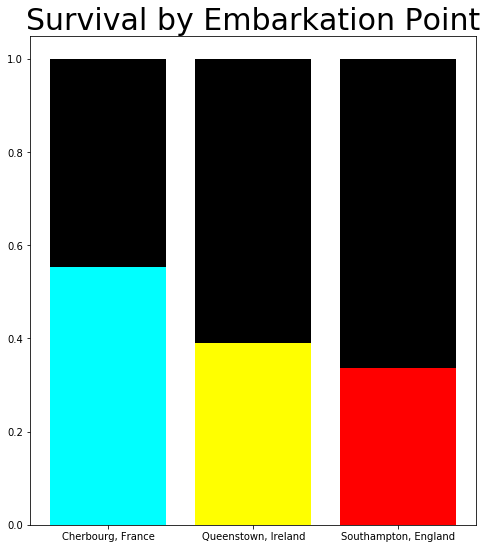

In [40]:
figure = plt.figure(figsize= (8,9))
plt.title('Survival by Embarkation Point', fontsize = 30)
p_d = plt.bar(['Southampton, England', 'Cherbourg, France', 'Queenstown, Ireland'], [1, 1, 1], color='black')
p_s = plt.bar(['Southampton, England', 'Cherbourg, France', 'Queenstown, Ireland'], [titanic[titanic['Embarked'] == 'S']['Survived'].mean(), titanic[titanic['Embarked'] == 'C']['Survived'].mean(), titanic[titanic['Embarked'] == 'Q']['Survived'].mean()], color=['red', 'cyan', 'yellow'])

Text(0.5,1,'Percentage of Passengers by Class')

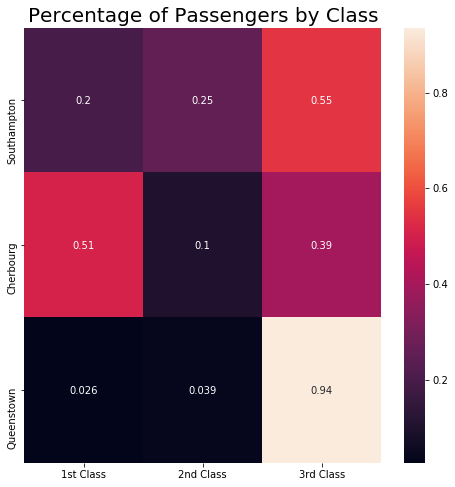

In [51]:
figure = plt.figure(figsize=(8,8))
embarkation = [(titanic[titanic['Pclass'] == 1]['Embarked_S'].sum() / titanic['Embarked_S'].sum()), (titanic[titanic['Pclass'] == 2]['Embarked_S'].sum() / titanic['Embarked_S'].sum()), (titanic[titanic['Pclass'] == 3]['Embarked_S'].sum() / titanic['Embarked_S'].sum()), (titanic[titanic['Pclass'] == 1]['Embarked_C'].sum() / titanic['Embarked_C'].sum()), (titanic[titanic['Pclass'] == 2]['Embarked_C'].sum() / titanic['Embarked_C'].sum()), (titanic[titanic['Pclass'] == 3]['Embarked_C'].sum() / titanic['Embarked_C'].sum()), (titanic[titanic['Pclass'] == 1]['Embarked_Q'].sum() / titanic['Embarked_Q'].sum()), (titanic[titanic['Pclass'] == 2]['Embarked_Q'].sum() / titanic['Embarked_Q'].sum()), (titanic[titanic['Pclass'] == 3]['Embarked_Q'].sum() / titanic['Embarked_Q'].sum())]
sns.heatmap(np.array(embarkation).reshape(3, 3), annot=True, xticklabels = ['1st Class', '2nd Class', '3rd Class'], yticklabels = ['Southampton', 'Cherbourg', 'Queenstown'])
plt.title('Percentage of Passengers by Class', fontsize=20)

In [42]:
print(titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 1)]['Survived'].sum())
print(len(titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 1)]))
(titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 1)]['Survived'].sum() / len(titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 1)])) * 100
#1st class children's survival rate

3
4


75.0

In [43]:
titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 1)]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Title
297,298,0,1,"Allison, Miss. Helen Loraine",2.00,1,2,113781,151.5500,C22 C26,...,1,0,0,0,0,0,0,0,0,Miss
305,306,1,1,"Allison, Master. Hudson Trevor",0.92,1,2,113781,151.5500,C22 C26,...,0,0,0,0,0,0,0,0,0,Master
445,446,1,1,"Dodge, Master. Washington",4.00,0,2,33638,81.8583,A34,...,0,0,0,0,0,0,0,0,0,Master
802,803,1,1,"Carter, Master. William Thornton II",11.00,1,2,113760,120.0000,B96 B98,...,0,0,0,0,0,0,0,0,0,Master


In [44]:
print(titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 2)]['Survived'].sum())
print(len(titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 2)]))
(titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 2)]['Survived'].sum() / len(titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 2)])) * 100
#2nd class children's survival rate

17
17


100.0

In [45]:
print(titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 3)]['Survived'].sum())
print(len(titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 3)]))
(titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 3)]['Survived'].sum() / len(titanic[(titanic['Age'] <= 12.0) & (titanic['Pclass'] == 3)])) * 100
#3rd class children's survival rate

20
48


41.66666666666667

In [46]:
titanic[titanic['Title_Capt'] == 1]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Title
745,746,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0,B22,...,0,0,0,0,0,0,0,0,0,Capt


However, despite being a captain of some sort (Apparently Mr. Crosby was an army captain on the Union side in the Civil War), and a casual Google search shows the captain of the Titanic was actually Edward John Smith

In [47]:
titanic[titanic['Name'].str.contains("Smith")]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Title
174,175,0,1,"Smith, Mr. James Clinch",56.0,0,0,17764,30.6958,A7,...,0,0,0,1,0,0,0,0,0,Mr
260,261,0,3,"Smith, Mr. Thomas",NaN,0,0,384461,7.7500,¯\(ツ)/¯,...,0,0,0,1,0,0,0,0,0,Mr
284,285,0,1,"Smith, Mr. Richard William",NaN,0,0,113056,26.0000,A19,...,0,0,0,1,0,0,0,0,0,Mr
346,347,1,2,"Smith, Miss. Marion Elsie",40.0,0,0,31418,13.0000,¯\(ツ)/¯,...,1,0,0,0,0,0,0,0,0,Miss


Edward Smith doesn't show up in the database, and is likely not in there because as a crewmember, he wouldn't have had a ticket. That said, being one of the premier examples of 'the captain goes down with his ship', it can be confirmed that he did indeed die.

In [48]:
titanic[titanic['Fare'] == (titanic[titanic['Survived'] == 0]['Fare'].max())]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Title
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0,C23 C25 C27,...,0,0,0,1,0,0,0,0,0,Mr
88,89,1,1,"Fortune, Miss. Mabel Helen",23.0,3,2,19950,263.0,C23 C25 C27,...,1,0,0,0,0,0,0,0,0,Miss
341,342,1,1,"Fortune, Miss. Alice Elizabeth",24.0,3,2,19950,263.0,C23 C25 C27,...,1,0,0,0,0,0,0,0,0,Miss
438,439,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0,C23 C25 C27,...,0,0,0,1,0,0,0,0,0,Mr


263 British pounds in 1912 is around 28,400 British pounds today, which is over 40,000 US dollars (40,345 to be precise.)

In [49]:
print(titanic[(titanic['FamilyCount'] > 0.0)]['Survived'].sum())
print(len(titanic[(titanic['FamilyCount'] > 0.0)]['Survived']))
(titanic[(titanic['FamilyCount'] > 0.0)]['Survived'].sum() / len(titanic[(titanic['FamilyCount'] > 0.0)]['Survived'])) * 100

179
354


50.56497175141242

In [50]:
print(titanic[(titanic['FamilyCount'] == 0.0)]['Survived'].sum())
print(len(titanic[(titanic['FamilyCount'] == 0.0)]['Survived']))
(titanic[(titanic['FamilyCount'] == 0.0)]['Survived'].sum() / len(titanic[(titanic['FamilyCount'] == 0.0)]['Survived'])) * 100

161
535


30.093457943925234